In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [37]:
class LinearRegression:
    ''' 
    SGD REGRESSION 

    y = theta1.x1 + theta2.x2 + ... + thetaN.xN + bias

    j(theta)  = 1/2m * sum((y - y_pred)^2)
    j(theta)_derivative = 1/m * sum((y - y_pred) * x)
    theta1 = theta1 - alpha * j(theta1)_derivative
    theta2 = theta2 - alpha * j(theta2)_derivative
    .
    .
    thetaN = thetaN - alpha * j(thetaN)_derivative

    bias = bias - alpha * sum(y - y_pred)
    y_pred = theta1.x1 + theta2.x2 + ... + thetaN.xN + bias

    '''

    def __init__(self, learning_rate=0.01, iterations=1000):

        self.alpha = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1]).reshape(X.shape[1], 1)

        def scale(X):
            scx = np.empty((len(X), 0), int)

            for i in range(X.shape[1]):
                scx = np.append(scx, ((X[:, i].reshape(-1, 1) - np.mean(
                    X[:, i].reshape(-1, 1)))/np.std(X[:, i].reshape(-1, 1))), axis=1)
            return scx

        self.bias = 0
        self.mu = np.mean(y, axis=0)
        self.sigma = np.std(y, axis=0)
        self.X = scale(X)
        self.y = scale(y)
        self.m = X.shape[0]
        self.n = X.shape[1]

        self.J_history = []
        self.theta_list = []

        self.theta_temp = np.zeros(self.theta.shape)

        for i in range(self.iterations):

            for j in range(len(self.theta)):

                self.theta_temp[j] = self.theta[j] - \
                    (self.alpha * self.cost_dev(j, self.theta))

            self.theta = self.theta_temp

            self.theta_list.append(list(self.theta))
            self.cost_val = self.cost()
            self.J_history.append(self.cost_val)

            self.bias = self.bias - self.alpha * \
                np.sum(self.predict_train(self.X) - self.y) / len(self.X)

        self.loss_ = np.sum(self.cost())

    def cost(self):
        cost = np.dot(np.transpose((np.dot(self.X, self.theta) -
                      self.y)), (np.dot(self.X, self.theta) - self.y))
        cost = (1/(2*self.m))*cost
        return cost

    def cost_dev(self, j, cost_theta,):
        dev = np.dot(np.transpose(
            self.X[:, j].reshape(-1, 1)), (np.dot(self.X, cost_theta) - self.y))
        dev = (1/self.m)*dev
        return dev

    def compute_cost(self):
        return (1/(2*self.m)) * np.dot(np.transpose((np.dot(self.X, self.theta) - self.y)), (np.dot(self.X, self.theta) - self.y))

    def scale(self, X):
        scx = np.empty((len(X), 0), int)

        for i in range(X.shape[1]):
            scx = np.append(scx, ((X[:, i].reshape(-1, 1) - np.mean(
                X[:, i].reshape(-1, 1)))/np.std(X[:, i].reshape(-1, 1))), axis=1)
        return scx

    def predict_train(self, X_train):
        y_pred = np.dot(X_train, self.theta) + self.bias

        return y_pred

    def y_test(self, X_test):

        return np.dot(self.scale(X_test), self.theta) + self.bias

    def predict(self, X_test):

        return self.y_test(X_test) * self.sigma + self.mu

    def plot_cost(self):
        plt.plot(range(self.iterations), np.squeeze(self.J_history))
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs. Iterations')
        plt.show()


4.780449355952081e-08


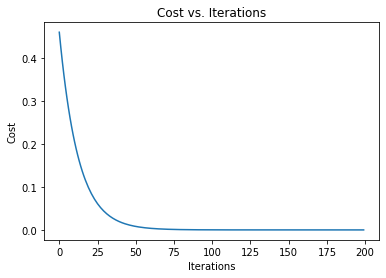

In [38]:
'''Simple Example'''
X = np.array([[1, 3], [2, 4], [3, 5], [4, 6], [5, 7], ])
y = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)

lr = LinearRegression(learning_rate=0.02, iterations=200)
lr.fit(X, y)
print(lr.loss_)
lr.plot_cost()


0.02154285269891207


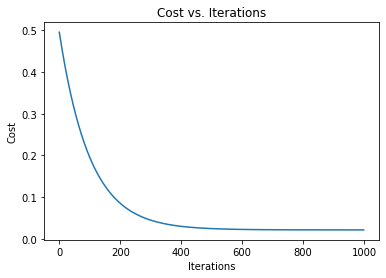

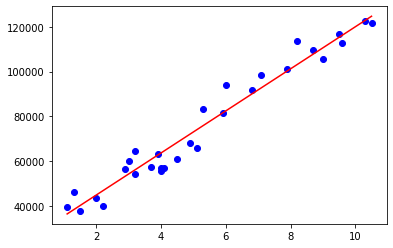

In [39]:
df = pd.read_csv('data/salary.csv')
X = df.iloc[:,0].values.reshape(-1, 1)
y = df.iloc[:, -1:].values.reshape(-1, 1)
lr = LinearRegression(learning_rate=0.005, iterations=1000)
lr.fit(X, y)
print(lr.loss_)

lr.plot_cost()

fig, ax = plt.subplots()

ax.scatter(df['YearsExperience'], df['Salary'], color='blue')
ax.plot(df['YearsExperience'], lr.predict(X), color='red')


In [40]:
df = pd.read_csv('data/profit.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
df.shape

(50, 5)

0.028734204517552132


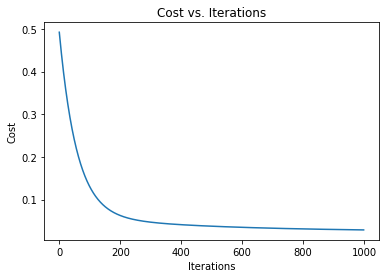

In [42]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, -1:].values.reshape(-1, 1)
lr = LinearRegression(learning_rate=0.005, iterations=1000)
lr.fit(X, y)
print(lr.loss_)
lr.plot_cost()